In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random as rand

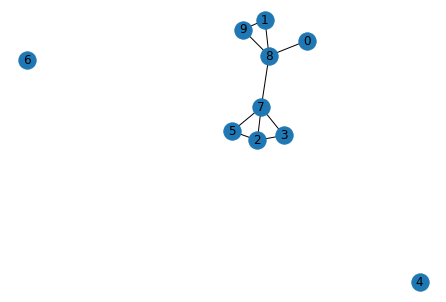

In [2]:
G = nx.gnm_random_graph(10, 10) # node_count, edge_count
#G = nx.path_graph(3)
#G = nx.cycle_graph(6)
#G = nx.complete_graph(6)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

In [3]:
# cost function
def H(Graph, color_map):
    E, cost = Graph.edges(), 0
    for (v, w) in E:
        if color_map[v] == color_map[w]:
            cost += 1
    return cost

In [4]:
# generate random color map
def gen_map(L, n):
    color_map = []
    for i in range(n):
        color_map.append(np.random.choice(L))
    return color_map

In [5]:
def color_picker(n):
    options = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    temp, opt_cop = [], options.copy()
    for i in range(n):
        c = np.random.choice(opt_cop)
        temp.append(c)
        opt_cop.remove(c)
    return temp

In [6]:
def new_color(L, ex):
    L.remove(ex)
    return np.random.choice(L)

In [7]:
def highest_degree(Graph):
    temp, max = Graph.degree(), 0
    for (v,d) in temp:
        if d > max:
            max = d
    return max

def avg_degree(Graph):
    temp, total = Graph.degree(), 0
    for (v,d) in temp:
        total += d
    return total/Graph.order() 

In [8]:
def anneal(Graph, colors):
    init_temp = 30
    final_temp = 0
    alpha = .1
    beta = 0.95

    current_temp = init_temp
    current_state = gen_map(colors, Graph.order())
    solution = current_state.copy()

    while(current_temp > final_temp):
        vertex = np.random.randint(0, Graph.order()-1)    # pick random vertex

        orig_color = current_state[vertex]
        current_state[vertex] = new_color(colors.copy(), orig_color)    # pick dif color from orig and re-color

        cost = H(G, current_state) - H(G, solution)    # compute cost
        if cost <= 0:
            if np.random.uniform(0, 1) < np.exp(-cost/current_temp):
                solution = current_state.copy()
        elif cost > 0:
            if np.random.uniform(0, 1) < np.exp(-beta*cost):
                solution = current_state.copy()
        else:
            current_state[vertex] = orig_color
        current_temp -= alpha
    return solution

cost: 0
highest degree: 4
avg degree: 2.0


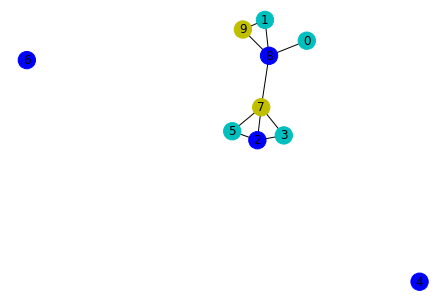

In [9]:
colors = color_picker(3)  # numb of possible colors (max 7)
numb_iter = 100

color_map = list(anneal(G, colors))
min_cost = H(G, color_map)

for i in range(numb_iter):
    temp = list(anneal(G, colors))
    temp_cost = H(G,temp)
    if temp_cost < min_cost:
        color_map = temp.copy()
        min_cost = temp_cost

print('cost: ' + str(min_cost))
print('highest degree: ' + str(highest_degree(G)))
print('avg degree: ' + str(avg_degree(G)))
nx.draw(G, pos, node_color=color_map , with_labels=True)
plt.show()